In [5]:
from convDiff_model import convDiff
from makeDataset import SampleDataset

import torch
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt



In [6]:
dataset = SampleDataset(image_size=128, translation=False, vary_psf=False)
loader = DataLoader(dataset,batch_size=1, shuffle=True, num_workers=2)
dataiter = iter(loader)

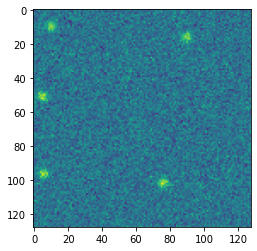

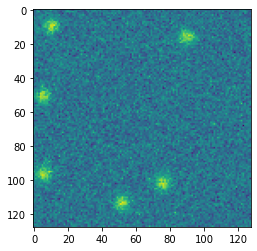

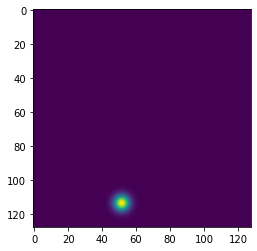

In [9]:
data = dataiter.next()
input = data[0]
truth = data[1]
plt.imshow(input[0,0,:,:])
plt.show()
plt.imshow(input[0,1,:,:])
plt.show()
plt.imshow(truth[0,0,:,:])
plt.show()


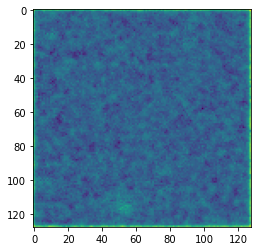

In [10]:
# Load model:
net = convDiff()
net.load_state_dict(
    torch.load('./ConvDiff.pth', 
               map_location=torch.device('cpu'))
)

with torch.no_grad():
    output = net(input.float())
plt.imshow(output[0,0,:,:])
plt.show()